In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

#parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('./dados/DADOS_ENEM_2013_TRATADOS.zip', encoding='latin1', sep=';')
dados.head()

,inscricao,idade,sexo,cor_raça,nacionalidade,status_conclusao,tipo_escola,treineiro,municipio_prova,uf_prova,presenca_cn,presenca_ch,presenca_lc,presenca_mt,nota_cn,nota_ch,nota_lc,nota_mt,tipo_lingua,status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nota_redacao
0,210061103945,6,F,1,1,1,1,0,Caxias do Sul,RS,1,1,1,1,502.00,498.90,475.60,363.20,1,1.00,140.00,200.00,100.00,120.00,140.00,700.00
1,210060214087,2,F,3,1,2,2,0,Fortaleza,CE,1,1,1,1,459.00,508.50,507.20,466.70,0,1.00,140.00,200.00,160.00,180.00,200.00,880.00
2,210059980948,3,F,3,1,2,2,0,Quixadá,CE,1,1,1,1,402.50,379.20,446.90,338.30,0,1.00,120.00,120.00,120.00,120.00,80.00,560.00
3,210060801601,11,M,1,1,1,1,0,Batatais,SP,1,1,1,1,564.70,630.30,610.40,680.20,0,1.00,120.00,120.00,120.00,120.00,120.00,600.00
4,210059085130,8,M,3,1,1,1,0,Natal,RN,1,1,1,1,644.90,620.20,626.90,736.30,0,1.00,140.00,200.00,160.00,160.00,200.00,860.00


In [3]:
dados.shape

(2678244, 26)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678244 entries, 0 to 2678243
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   inscricao         int64  
 1   idade             int64  
 2   sexo              object 
 3   cor_raça          int64  
 4   nacionalidade     int64  
 5   status_conclusao  int64  
 6   tipo_escola       int64  
 7   treineiro         int64  
 8   municipio_prova   object 
 9   uf_prova          object 
 10  presenca_cn       int64  
 11  presenca_ch       int64  
 12  presenca_lc       int64  
 13  presenca_mt       int64  
 14  nota_cn           float64
 15  nota_ch           float64
 16  nota_lc           float64
 17  nota_mt           float64
 18  tipo_lingua       int64  
 19  status_redacao    float64
 20  nu_nota_comp1     float64
 21  nu_nota_comp2     float64
 22  nu_nota_comp3     float64
 23  nu_nota_comp4     float64
 24  nu_nota_comp5     float64
 25  nota_redacao      float64
dtypes: float64(11)

In [5]:
colunas_categoricas = ['sexo', 'cor_raça', 'tipo_escola', 'status_conclusao', 'treineiro', 
                       'municipio_prova', 'uf_prova', 'presenca_cn', 'presenca_ch', 
                       'presenca_lc', 'presenca_mt', 'tipo_lingua', 'status_redacao']
for col in colunas_categoricas:
    dados[col] = dados[col].astype('category')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678244 entries, 0 to 2678243
Data columns (total 26 columns):
 #   Column            Dtype   
---  ------            -----   
 0   inscricao         int64   
 1   idade             int64   
 2   sexo              category
 3   cor_raça          category
 4   nacionalidade     int64   
 5   status_conclusao  category
 6   tipo_escola       category
 7   treineiro         category
 8   municipio_prova   category
 9   uf_prova          category
 10  presenca_cn       category
 11  presenca_ch       category
 12  presenca_lc       category
 13  presenca_mt       category
 14  nota_cn           float64 
 15  nota_ch           float64 
 16  nota_lc           float64 
 17  nota_mt           float64 
 18  tipo_lingua       category
 19  status_redacao    category
 20  nu_nota_comp1     float64 
 21  nu_nota_comp2     float64 
 22  nu_nota_comp3     float64 
 23  nu_nota_comp4     float64 
 24  nu_nota_comp5     float64 
 25  nota_redacao      

In [6]:
dados.iloc[:, 1:].describe()

,idade,nacionalidade,nota_cn,nota_ch,nota_lc,nota_mt,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nota_redacao
count,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00,2678244.00
mean,4.39,1.03,495.92,526.21,520.30,534.03,122.90,141.22,120.14,131.52,110.82,626.61
std,3.50,0.21,87.77,86.79,74.11,131.52,34.30,50.40,42.41,42.61,61.02,209.03
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,440.60,471.20,473.70,431.40,120.00,120.00,100.00,120.00,60.00,520.00
50%,3.00,1.00,494.00,532.90,524.90,523.80,120.00,140.00,120.00,120.00,120.00,620.00
75%,5.00,1.00,551.30,586.90,571.80,630.30,140.00,180.00,140.00,160.00,160.00,780.00
max,20.00,4.00,868.40,823.00,820.80,958.60,200.00,200.00,200.00,200.00,200.00,1000.00


In [7]:
dados.nunique()

inscricao           2678244
idade                    20
sexo                      2
cor_raça                  6
nacionalidade             5
status_conclusao          4
tipo_escola               3
treineiro                 2
municipio_prova        1715
uf_prova                 27
presenca_cn               1
presenca_ch               1
presenca_lc               1
presenca_mt               1
nota_cn                5036
nota_ch                4811
nota_lc                4760
nota_mt                6056
tipo_lingua               2
status_redacao            8
nu_nota_comp1            11
nu_nota_comp2            10
nu_nota_comp3            12
nu_nota_comp4            11
nu_nota_comp5            11
nota_redacao             50
dtype: int64

In [8]:
m = dados[dados['sexo'] == 'M'].shape
f = dados[dados['sexo'] == 'F'].shape
print(f"A quantidade de participantes Masculina foi de {m[0]} participantes")
print(f"A quantidade de participantes Feminina foi de {f[0]} participantes")

A quantidade de participantes Masculina foi de 1034206 participantes
A quantidade de participantes Feminina foi de 1644038 participantes


Text(0, 0.5, 'Quantidade')

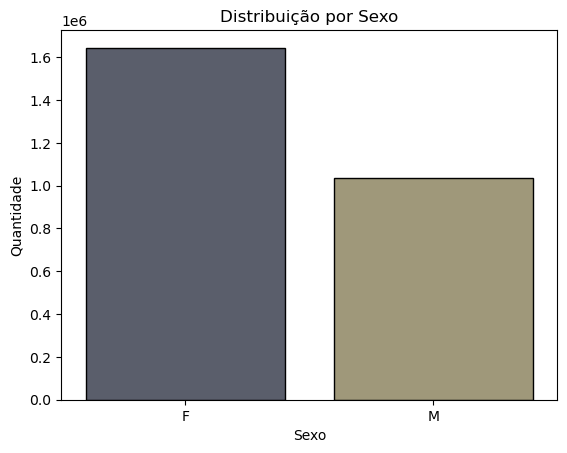

In [9]:
sexo_counts = dados['sexo'].value_counts()
cores = ['#D62728', '#1f77b4']
#plt.figure(figsize=(8, 6))
#plt.bar(sexo_counts.index, sexo_counts.values, color=cores, edgecolor='black')

sns.countplot(data=dados, x='sexo', hue='sexo', palette='cividis', edgecolor='black', legend=False)

plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

In [10]:
raca = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Sem informação'
}
dados['cor/raca'] = dados['cor_raça'].map(raca)

In [11]:
dados['cor/raca'].value_counts()

cor/raca
Branca           1153775
Parda            1117217
Preta             316995
Amarela            42674
Não Declarado      33230
Indígena           14353
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

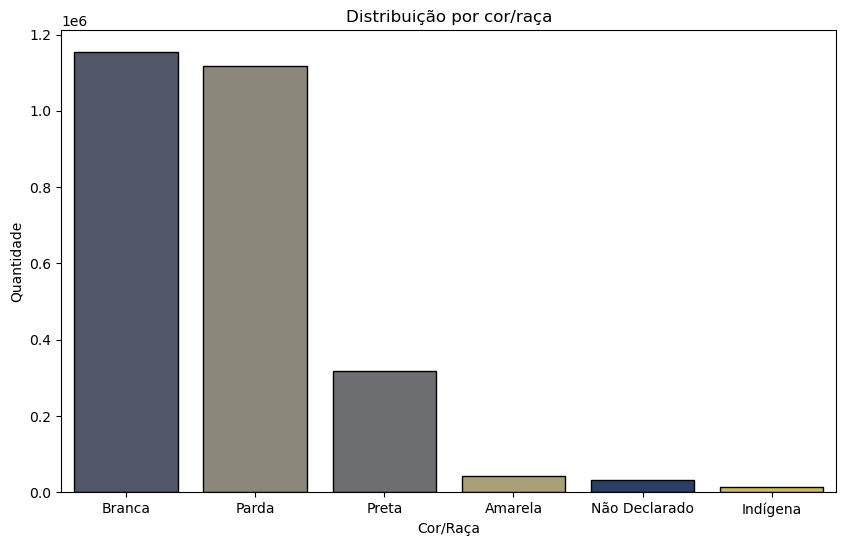

In [12]:
plt.figure(figsize=(10, 6))
ordem = dados['cor/raca'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=dados, x='cor/raca', hue='cor/raca', palette='cividis', order=ordem, edgecolor='black', legend=False)

plt.title('Distribuição por cor/raça')
plt.xlabel('Cor/Raça')
plt.ylabel('Quantidade')
plt.show()

In [13]:
faixa_etaria = {
    1: '-17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: '26-30 anos',
    12: '31-35 anos',
    13: '36-40 anos',
    14: '41-45 anos',
    15: '46-50 anos',
    16: '51-55 anos',
    17: '56-60 anos',
    18: '61-65 anos',
    19: '66-70 anos',
    20: 'maior de 70 anos'
}
dados['faixa_idade'] = dados['idade'].map(faixa_etaria)
dados['faixa_idade'] = pd.Categorical(dados['faixa_idade'], categories=faixa_etaria.values(), ordered=True)

In [14]:
dados['faixa_idade'].value_counts().sort_values(ascending=False)

faixa_idade
18 anos             682825
17 anos             620795
19 anos             292329
-17 anos            288515
20 anos             169356
26-30 anos          114427
21 anos             108732
22 anos              77813
31-35 anos           60221
23 anos              59720
24 anos              46689
36-40 anos           44933
25 anos              36110
41-45 anos           31615
46-50 anos           20127
51-55 anos           12350
56-60 anos            6974
61-65 anos            3038
66-70 anos            1193
maior de 70 anos       482
Name: count, dtype: int64

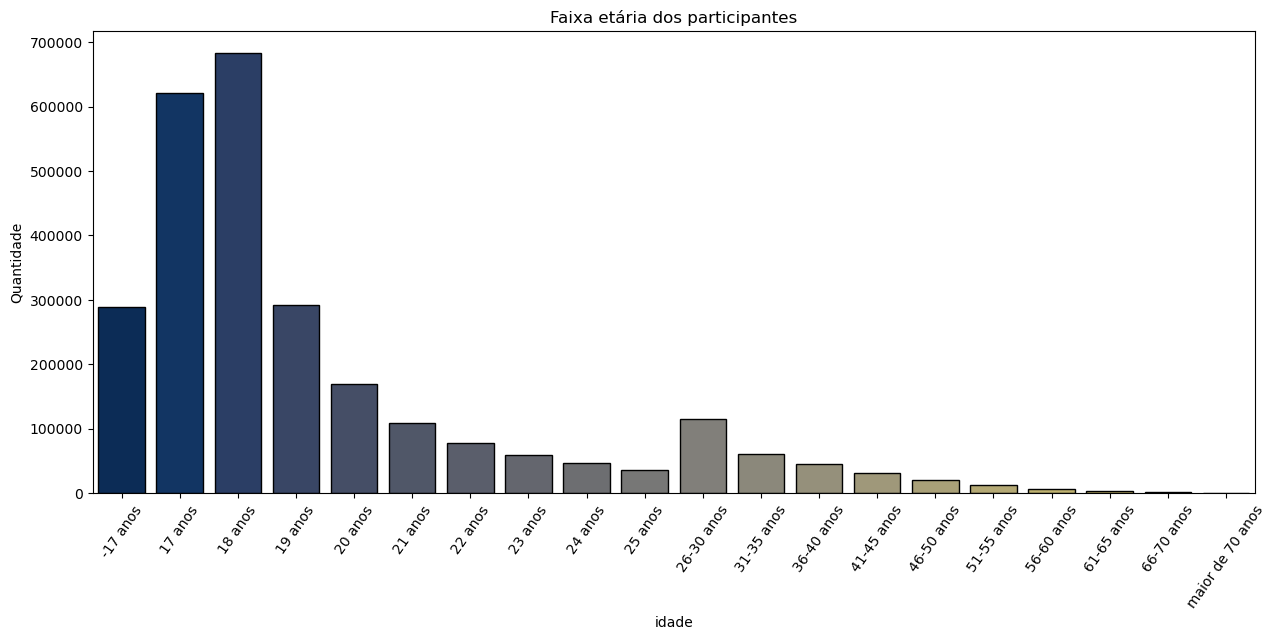

In [15]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dados, x='faixa_idade', hue='faixa_idade', palette='cividis', edgecolor='black', legend=False)
plt.title('Faixa etária dos participantes')
plt.xlabel('idade')
plt.ylabel('Quantidade')
plt.xticks(rotation=55)
plt.show()

In [16]:
#Nacionalidade (ou apenas brasileiros vs estrangeiros)
nacionalidade = {
    0: 'Não Informado',
    1: 'Brasileiro(a)',
    2: 'Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'BR nasc(a) no exterior'
}
dados['tp_nacionalidade'] = dados['nacionalidade'].map(nacionalidade)

In [17]:
dados['tp_nacionalidade'].value_counts()

tp_nacionalidade
Brasileiro(a)             2618369
Naturalizado(a)             47605
BR nasc(a) no exterior       6336
Estrangeiro(a)               4690
Não Informado                1244
Name: count, dtype: int64

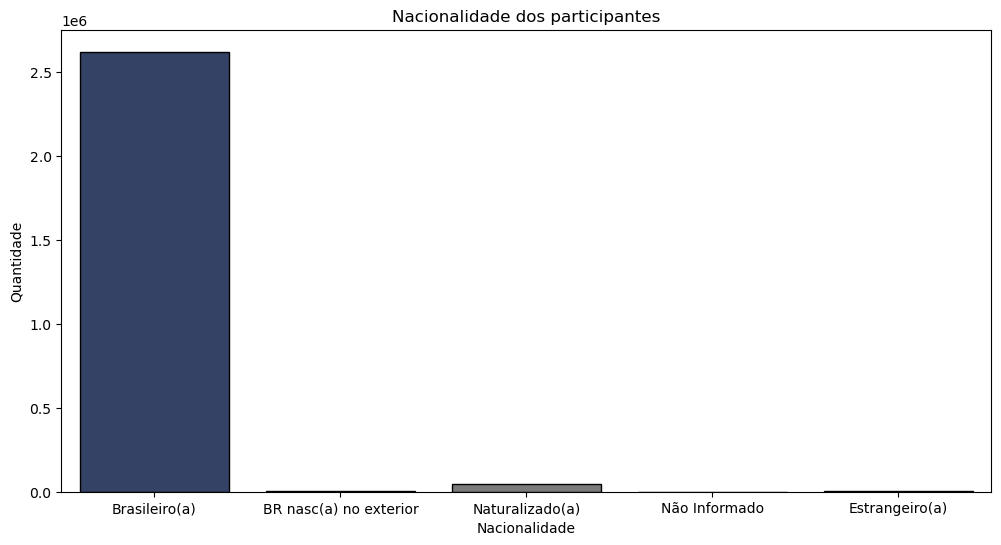

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados, x='tp_nacionalidade', hue='tp_nacionalidade', palette='cividis', edgecolor='black', legend=False)
plt.title('Nacionalidade dos participantes')
plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade')
#plt.xticks(rotation=55)
plt.show()

In [19]:
#Treineiros vs não treineiros
treineiro = {
    0: 'Não',
    1: 'Sim'
}
dados['in_treineiro'] = dados['treineiro'].map(treineiro)

In [20]:
dados['in_treineiro'].value_counts()

in_treineiro
Não    2166824
Sim     511420
Name: count, dtype: int64

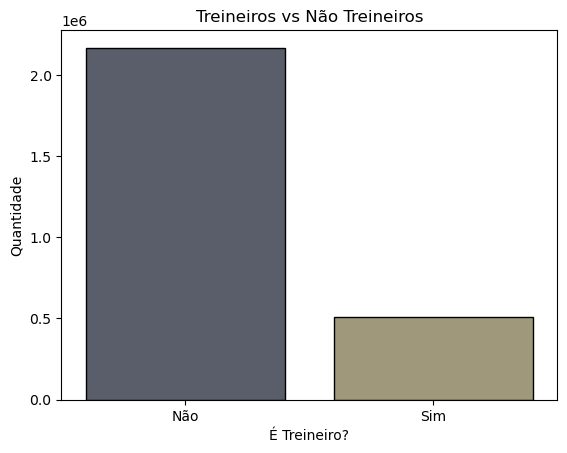

In [21]:
#plt.figure(figsize=(8, 6))
sns.countplot(data=dados, x='in_treineiro',  hue='in_treineiro', palette='cividis', edgecolor='black', legend=False)
plt.title('Treineiros vs Não Treineiros')
plt.xlabel('É Treineiro?')
plt.ylabel('Quantidade')
#plt.xticks(rotation=55)
plt.show()

In [57]:
#tipo_escola
escola = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}
dados['tp_escola'] = dados['tipo_escola'].map(escola)
dados['tp_escola'].value_counts()

tp_escola
Não Respondeu    1627390
Pública           829527
Privada           221327
Name: count, dtype: int64

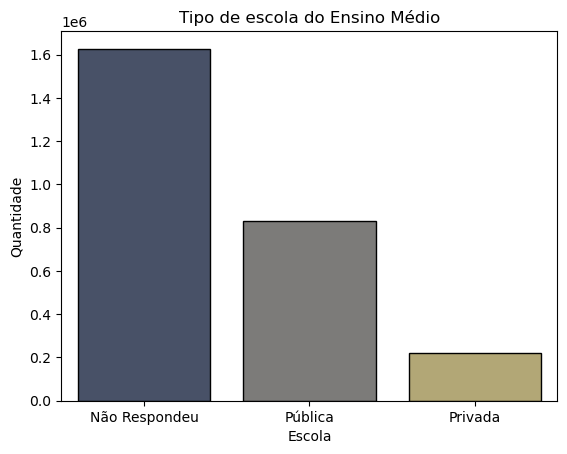

In [58]:
#plt.figure(figsize=(15, 6))
sns.countplot(data=dados, x='tp_escola', hue='tp_escola', palette='cividis', edgecolor='black', legend=False)
plt.title('Tipo de escola do Ensino Médio')
plt.xlabel('Escola')
plt.ylabel('Quantidade')
#plt.xticks(rotation=55)
plt.show()

In [ ]:
#Distribuição Geográfica

In [26]:
#municipio_prova       
#uf_prova        
dados['uf_prova'].value_counts()

uf_prova
SP    409477
MG    250014
BA    220257
RJ    184500
CE    173699
PA    153293
PE    152571
PR    114776
MA    112482
RS    110734
GO     96351
PB     87601
RN     72802
PI     70761
SC     62699
AL     54953
DF     50267
ES     49234
AM     47909
SE     47189
MT     41481
MS     31238
RO     22998
TO     21612
AP     18177
AC     15099
RR      6070
Name: count, dtype: int64

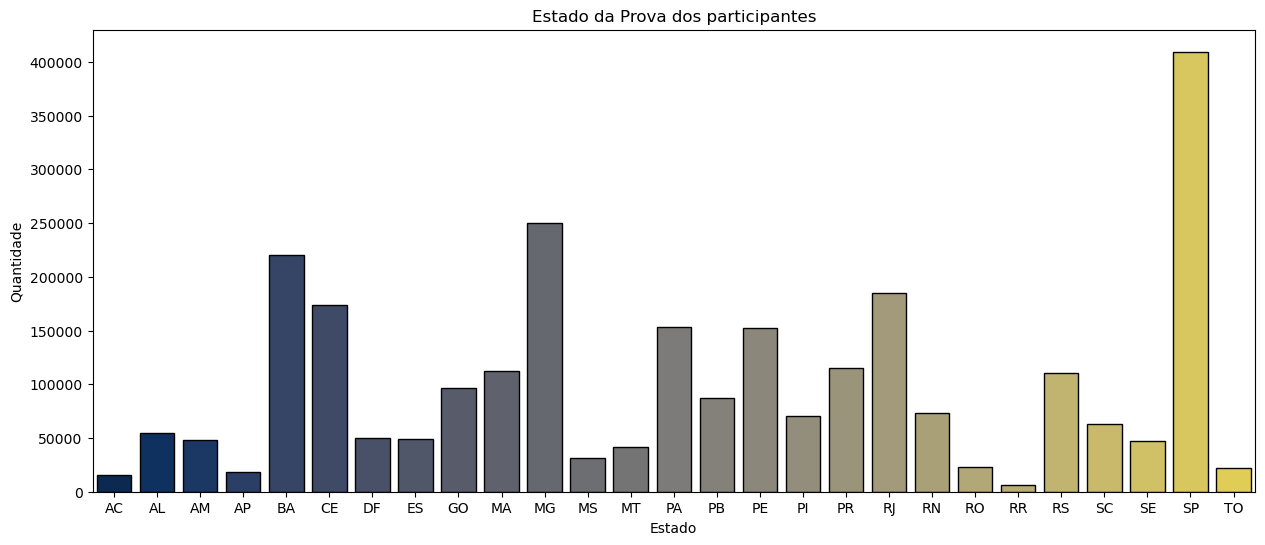

In [104]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dados, x='uf_prova', hue='uf_prova', palette='cividis', edgecolor='black', legend=False)
plt.title('Estado da Prova dos participantes')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
#plt.xticks(rotation=55)
plt.show()

In [28]:
dados['municipio_prova'].value_counts().head(10)

municipio_prova
São Paulo         105986
Rio de Janeiro     74828
Fortaleza          50375
Brasília           50267
Salvador           43937
Belém              43055
Belo Horizonte     40211
Recife             33257
São Luís           32685
Manaus             32608
Name: count, dtype: int64

In [31]:
dados['municipio_prova'].value_counts().tail(10)

municipio_prova
Porto Walter           47
Uarini                 45
Barra do Turvo         43
Jordão                 41
Canutama               40
Carlinda               39
Bonfim                 27
Japurá                 25
Fernando de Noronha    24
Santa Rosa do Purus    16
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6996\3493288495.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_top, x='municipio_prova', order=top_cidades, palette='cividis', edgecolor='black')


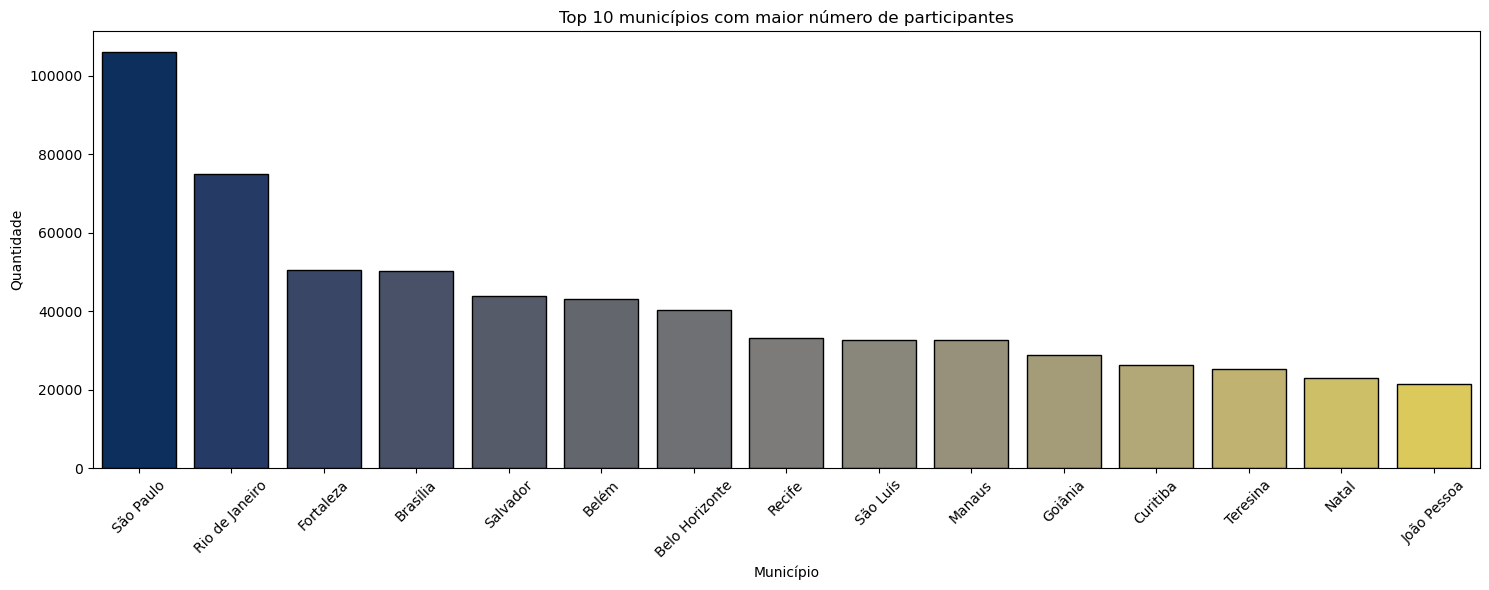

In [49]:
# Seleciona os 10 municípios com mais participantes
top_cidades = dados['municipio_prova'].value_counts().head(15).index

# Filtra o DataFrame apenas com esses municípios
dados_top = dados[dados['municipio_prova'].isin(top_cidades)]

# Gráfico
plt.figure(figsize=(15, 6))
sns.countplot(data=dados_top, x='municipio_prova', order=top_cidades, palette='cividis', edgecolor='black')
plt.title('Top 10 municípios com maior número de participantes')
plt.xlabel('Município')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 3. Comparações de Desempenho
#Média de notas por sexo

#Média por cor/raça

#Média por UF

#Comparação entre participantes treineiros e não-treineiros

#Distribuição das notas por área (CN, CH, LC, MT, Redação)

In [60]:
dados['media_aritmetrica'] = (dados['nota_cn'] + dados['nota_ch'] + dados['nota_lc'] + dados['nota_mt'] + dados['nota_redacao']) / 5
dados['media_aritmetrica'].value_counts()

media_aritmetrica
528.60    265
542.20    262
532.90    261
532.76    260
516.20    260
         ... 
464.78      1
371.44      1
284.68      1
212.14      1
208.00      1
Name: count, Length: 56881, dtype: int64

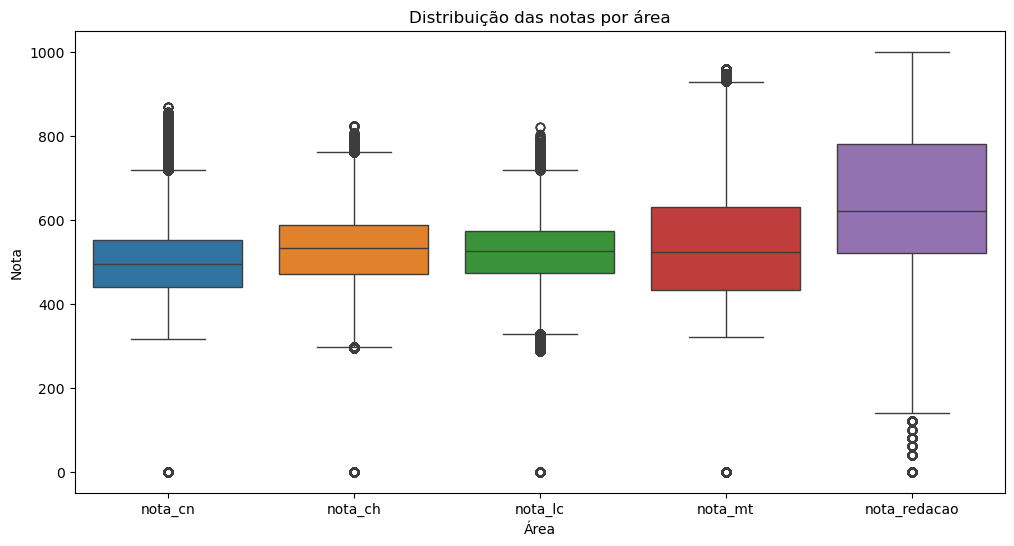

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados[['nota_cn', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']])
plt.title('Distribuição das notas por área')
plt.xlabel('Área')
plt.ylabel('Nota')
plt.show()

sexo  media_aritmetrica
F     537.99               1
M     544.78               1
Name: count, dtype: int64


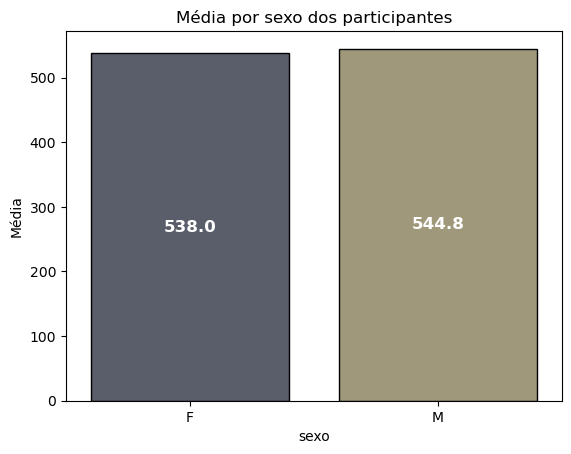

In [119]:
agrupado_sexo = dados.groupby('sexo', observed=True)['media_aritmetrica'].mean().reset_index()

ax = sns.barplot(data=agrupado_sexo, x='sexo', y='media_aritmetrica', hue='sexo', palette='cividis', edgecolor='black', legend=False)
plt.title('Média por sexo dos participantes')
plt.xlabel('sexo')
plt.ylabel('Média')

print(agrupado_sexo.value_counts())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.show()

cor/raca       media_aritmetrica
Não Declarado  539.24               1
Branca         568.86               1
Preta          512.23               1
Parda          520.49               1
Amarela        536.18               1
Indígena       479.19               1
Name: count, dtype: int64


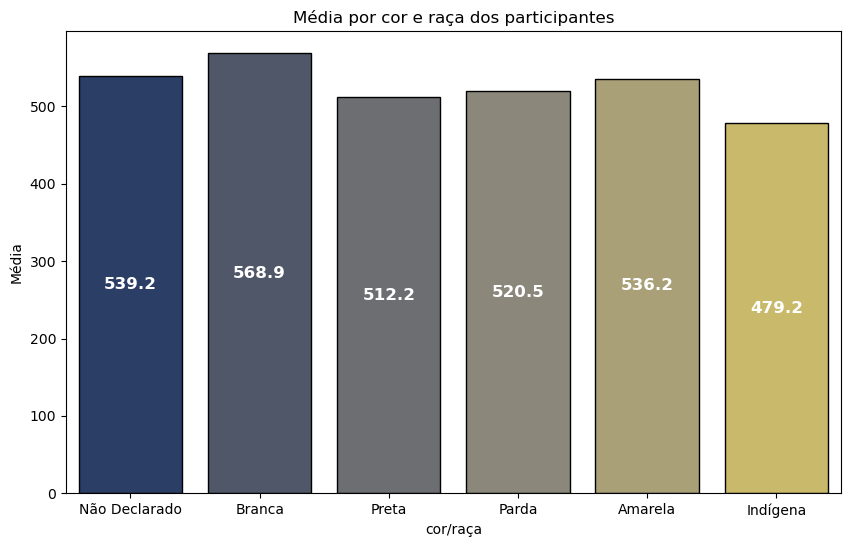

In [117]:
cor_raca = dados.groupby('cor/raca', observed=True)['media_aritmetrica'].mean().reset_index()


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cor_raca, x='cor/raca', y='media_aritmetrica', hue='cor/raca', palette='cividis', edgecolor='black', legend=False)
plt.title('Média por cor e raça dos participantes')
plt.xlabel('cor/raça')
plt.ylabel('Média')

print(cor_raca.value_counts())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.show()

uf_prova  media_aritmetrica
AC        513.75               1
PB        529.38               1
SP        564.93               1
SE        529.64               1
SC        559.63               1
RS        557.57               1
RR        529.34               1
RO        517.70               1
RN        536.96               1
RJ        556.00               1
PR        550.06               1
PI        518.26               1
PE        532.35               1
PA        508.68               1
AL        520.70               1
MT        526.76               1
MS        533.92               1
MG        565.14               1
MA        504.48               1
GO        542.79               1
ES        556.56               1
DF        558.87               1
CE        528.94               1
BA        524.65               1
AP        508.04               1
AM        500.21               1
TO        518.66               1
Name: count, dtype: int64


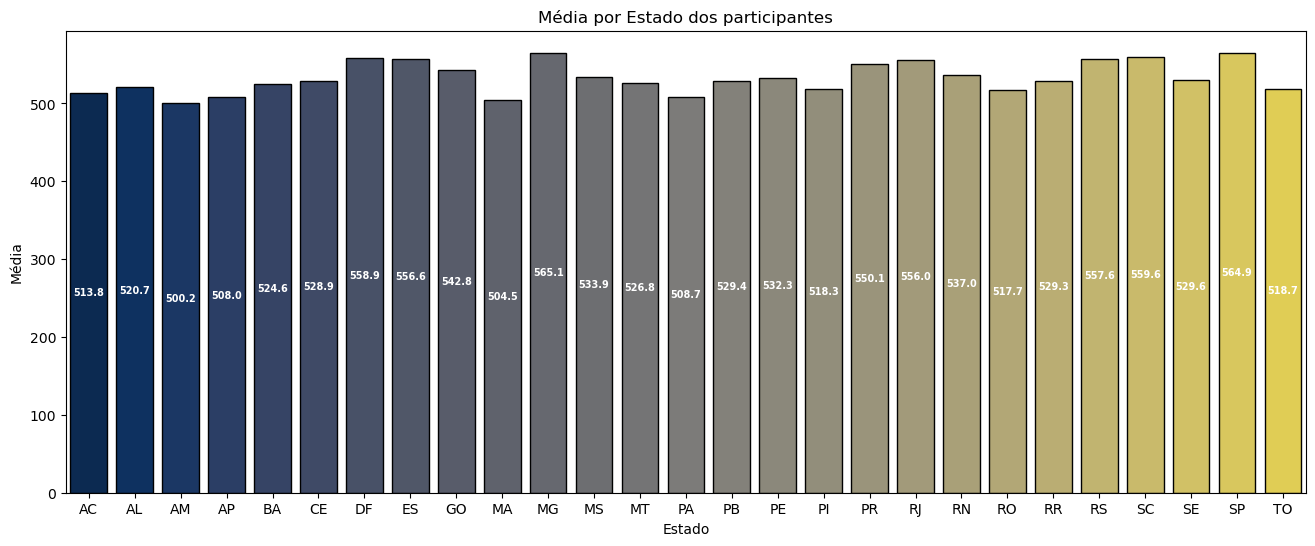

In [116]:
estado_prv = dados.groupby('uf_prova', observed=True)['media_aritmetrica'].mean().reset_index()

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=estado_prv, x='uf_prova', y='media_aritmetrica', hue='uf_prova', palette='cividis', edgecolor='black', legend=False)
plt.title('Média por Estado dos participantes')
plt.xlabel('Estado')
plt.ylabel('Média')

print(estado_prv.value_counts())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=7, fontweight='bold')
plt.show()

in_treineiro  media_aritmetrica
Não           540.51               1
Sim           541.04               1
Name: count, dtype: int64


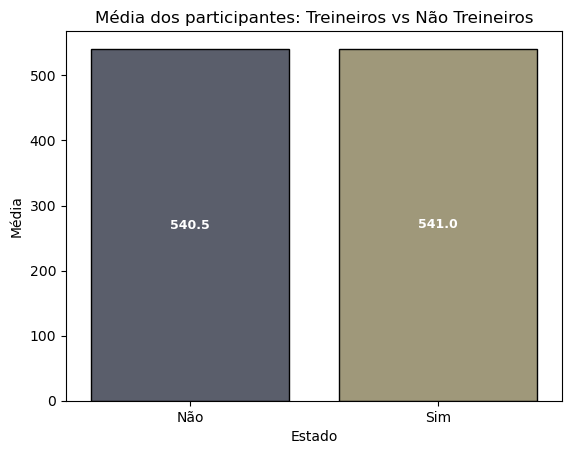

In [120]:
treineiro = dados.groupby('in_treineiro', observed=True)['media_aritmetrica'].mean().reset_index()

ax = sns.barplot(data=treineiro, x='in_treineiro', y='media_aritmetrica', hue='in_treineiro', palette='cividis', edgecolor='black', legend=False)
plt.title('Média dos participantes: Treineiros vs Não Treineiros')
plt.xlabel('Estado')
plt.ylabel('Média')

print(treineiro.value_counts())
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=9, fontweight='bold')
plt.show()

tp_escola      media_aritmetrica
Não Respondeu  543.00               1
Pública        515.79               1
Privada        616.09               1
Name: count, dtype: int64


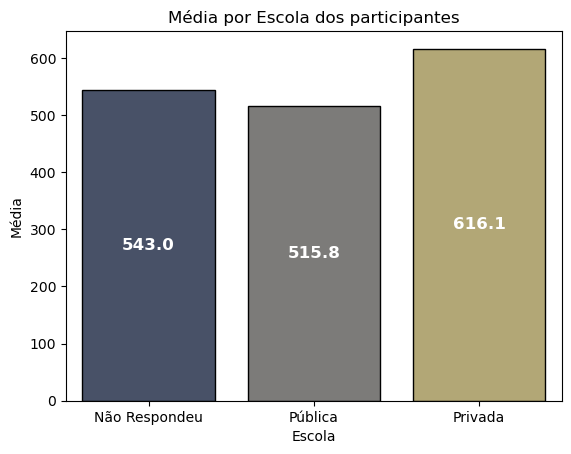

In [113]:
escola = dados.groupby('tp_escola', observed=True)['media_aritmetrica'].mean().reset_index()

ax = sns.barplot(data=escola, x='tp_escola', y='media_aritmetrica', hue='tp_escola', palette='cividis', edgecolor='black', legend=False)
plt.title('Média por Escola dos participantes')
plt.xlabel('Escola')
plt.ylabel('Média')

print(escola.value_counts())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=12, fontweight='bold')
plt.show()

faixa_idade       media_aritmetrica
-17 anos          547.04               1
17 anos           548.60               1
66-70 anos        457.66               1
61-65 anos        471.00               1
56-60 anos        481.00               1
51-55 anos        481.94               1
46-50 anos        486.34               1
41-45 anos        494.01               1
36-40 anos        507.21               1
31-35 anos        520.29               1
26-30 anos        528.75               1
25 anos           535.06               1
24 anos           537.92               1
23 anos           541.80               1
22 anos           543.98               1
21 anos           544.66               1
20 anos           543.38               1
19 anos           541.57               1
18 anos           540.81               1
maior de 70 anos  442.03               1
Name: count, dtype: int64


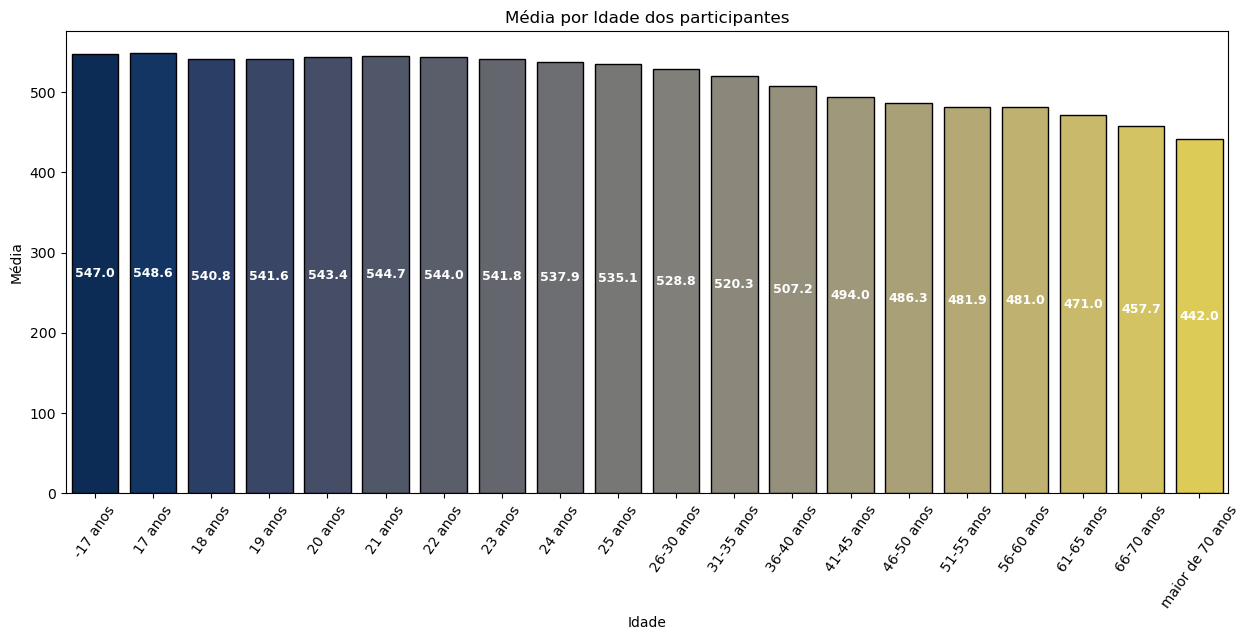

In [111]:
idade = dados.groupby('faixa_idade', observed=True)['media_aritmetrica'].mean().reset_index()

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=idade, x='faixa_idade', y='media_aritmetrica', hue='faixa_idade', palette='cividis', edgecolor='black', legend=False)
plt.title('Média por Idade dos participantes')
plt.xlabel('Idade')
plt.ylabel('Média')
plt.xticks(rotation=55)
print(idade.value_counts())

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=9, fontweight='bold')

plt.show()